# Alcohol Sales Time Series Forecasting


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
alc = pd.read_csv('/content/Alcohol_Sales.csv')

#Data Cleaning

In [3]:
alc.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [4]:
alc.tail()

,DATE,S4248SM144NCEN
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504
324,2019-01-01,10718


In [5]:
alc

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [6]:
alc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [7]:
# Checking the null values
alc.isnull().sum()

,0
DATE,0
S4248SM144NCEN,0


In [8]:
# Changing the name
alc = alc.rename(columns={'S4248SM144NCEN': 'sales'})

In [9]:
# rechecking
alc.head()

,DATE,sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


# Problem Statement




1.  We need to forecast the sales next 24 months




In [10]:
# Converting data type of date column

In [11]:
alc.DATE = pd.to_datetime(alc.DATE, infer_datetime_format=True)

In [12]:
alc.head()

,DATE,sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [13]:
alc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    325 non-null    datetime64[ns]
 1   sales   325 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [14]:
# setting date column as index
alc = alc.set_index('DATE')

In [15]:
alc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


# Checking the series stationary

In [16]:
import matplotlib.pyplot as plt


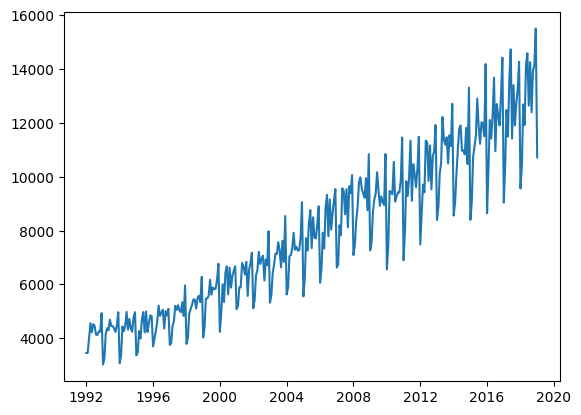

In [17]:
plt.plot(alc)



*    If series is not stationary then we will make it stationary by using diffrencing method.



# Differencing method

In [18]:
alc.diff()

,sales
DATE,
1992-01-01,NaN
1992-02-01,-1.0
1992-03-01,544.0
1992-04-01,562.0
1992-05-01,-343.0
...,...
2018-09-01,-1861.0
2018-10-01,1518.0
2018-11-01,260.0


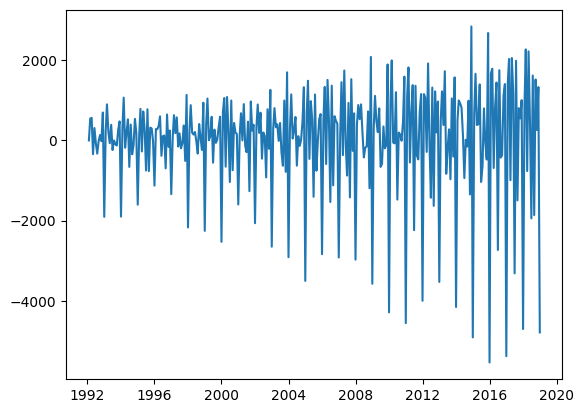

In [19]:
plt.plot(alc.diff())

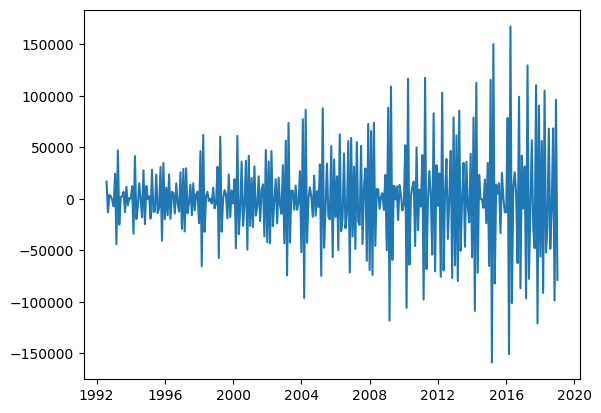

In [20]:
plt.plot(alc.diff().diff().diff().diff().diff().diff().diff())



*   Even after multiple of differencing the series is still not stationary



# Taking the log to make series stationary

In [21]:
alc_log = np.log(alc)

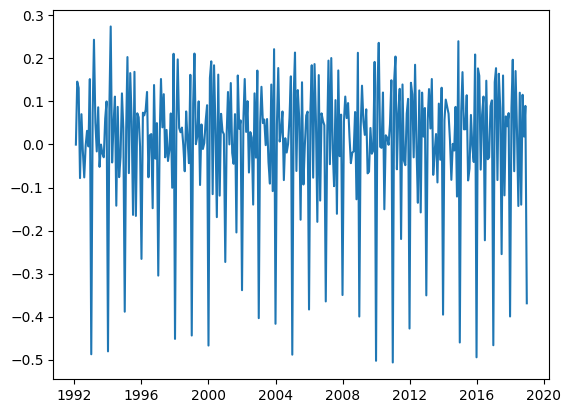

In [22]:
plt.plot(alc_log.diff())



1.   After first level of diff series got stationary so value of d=1
2.   Here we need to find the value of p and q



# Plotting ACF and PACF

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

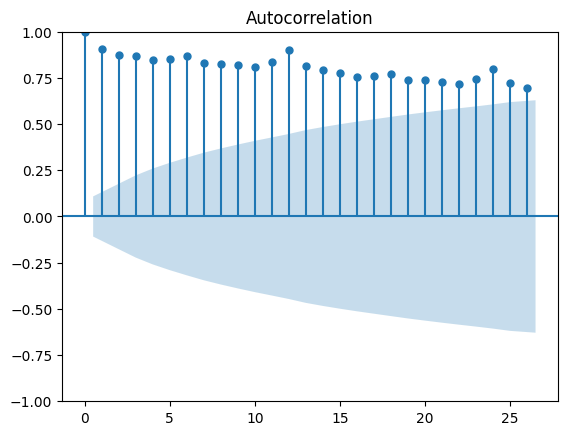

In [24]:
plot_acf(alc_log.sales);

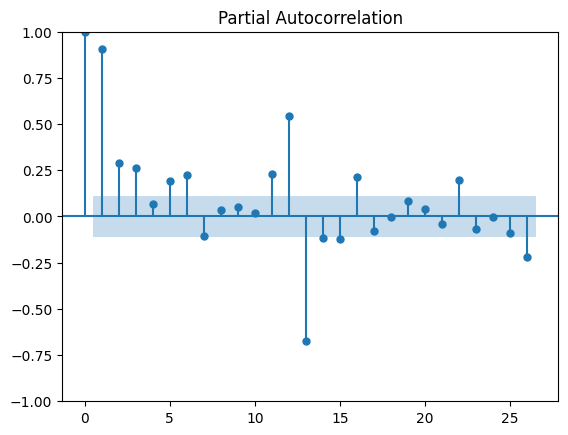

In [25]:
plot_pacf(alc_log.sales);



1.   As ACF declines slowly and PACF declines sharply then we called it as AR process.
2.   for ARIMA we got the values as p=2, d=1, q=0.



In [26]:
#!pip install pmdarima

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [29]:
#pip install "numpy<2"

# Checking Seasonality

In [30]:
result = seasonal_decompose(alc_log)

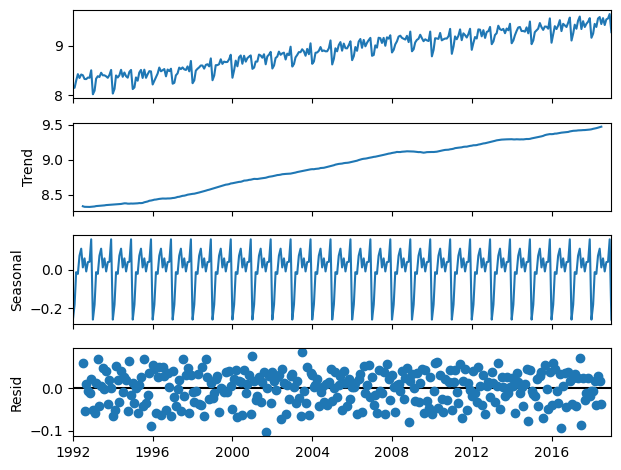

In [31]:
result.plot();

# Model Building by using SARIMAX


In [42]:
auto_arima(alc_log, seasonal=True, m=24)

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(1, 0, 2, 24),
      suppress_warnings=True, with_intercept=False)

In [44]:
model_sarima = SARIMAX(alc_log, order=(2,1,0), seasonal_order=(1,0,2,24))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
alc_model = model_sarima.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
pred_values = alc_model.predict(start=325, end=348)

In [47]:
pred_values

,predicted_mean
2019-02-01,9.346696
2019-03-01,9.481139
2019-04-01,9.524817
2019-05-01,9.600392
2019-06-01,9.631869
2019-07-01,9.572614
2019-08-01,9.583121
2019-09-01,9.549761
2019-10-01,9.590255
2019-11-01,9.572890


In [48]:
pred_values1 = np.exp(pred_values)

#Final Prediction

In [49]:
pred_values1

,predicted_mean
2019-02-01,11460.897235
2019-03-01,13110.106965
2019-04-01,13695.418817
2019-05-01,14770.570249
2019-06-01,15242.891955
2019-07-01,14365.920251
2019-08-01,14517.664479
2019-09-01,14041.337391
2019-10-01,14621.601757
2019-11-01,14369.878677


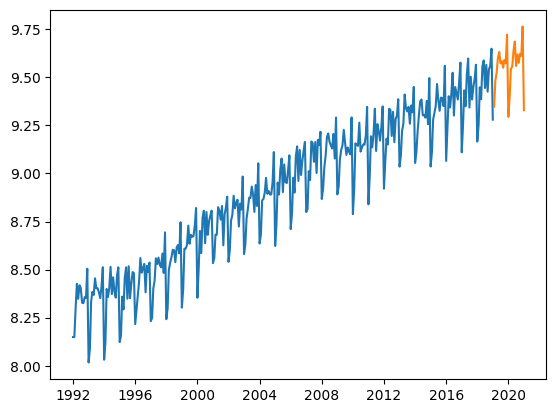

In [50]:
plt.plot(alc_log)
plt.plot(pred_values)

In [51]:
df = pd.DataFrame()

df['predicted'] = pred_values1
date_for_pred = ['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
                 '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
                 '2020-12-01', '2021-01-01']
df['Month'] = date_for_pred

df.Month = pd.to_datetime(df.Month, infer_datetime_format=True)
df = df.set_index('Month')

In [52]:
df

,predicted
Month,
2019-02-01,11460.897235
2019-03-01,13110.106965
2019-04-01,13695.418817
2019-05-01,14770.570249
2019-06-01,15242.891955
2019-07-01,14365.920251
2019-08-01,14517.664479
2019-09-01,14041.337391
2019-10-01,14621.601757


<Axes: xlabel='Month'>

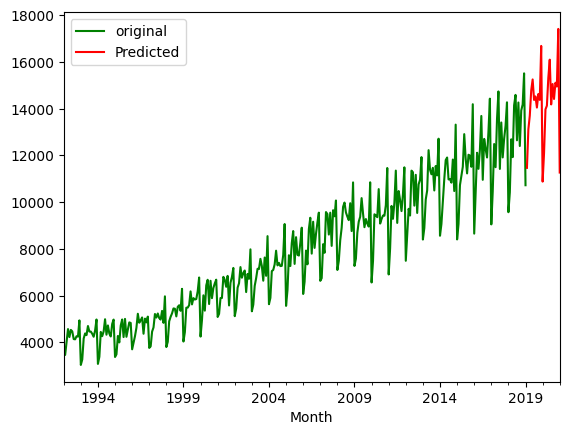

In [53]:
alc['sales'].plot(legend = True, label = 'original', color = 'green')
df.predicted.plot(legend = True, label = 'Predicted', color = 'red')